In [128]:
# 必要なライブラリのインクルード
import os
from math import *
import re
import cv2
from PIL import Image as pilim
from PIL import ImageFilter
import matplotlib.pyplot as plt
import numpy as np
# opencv画像入力用
from IPython.display import display, Image
%matplotlib inline
def display_cv_image(image, format='.JPG'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))
def resizeAndShow(img,num):
    size = (4*num,4*num)
    show_img = cv2.resize(img, size)
    display_cv_image(show_img)

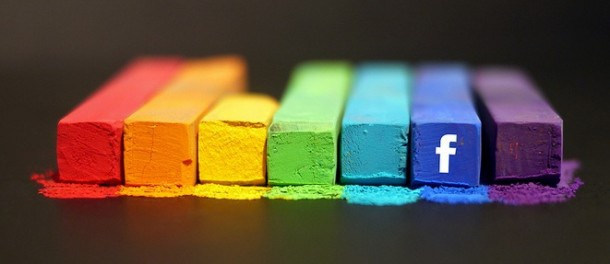

(264, 610, 3)


In [157]:
img = cv2.imread("./img/test.jpg")
display_cv_image(img)
print(img.shape)

In [169]:
def affine(y_rate,x_rate,img): #見ため的には(xの拡大率、yの拡大率,img)となるようにした。
    width = img.shape[0]
    height = img.shape[1]
    after_width = width*x_rate
    after_height =height*y_rate
    
    after_img = np.zeros((after_width,after_height,3))
    print(after_img.shape)
    for x in range(0,after_width):
        for y in range(0,after_height):
            alpha= x/x_rate - int(x/x_rate)
            beta = y/y_rate -  int(y/y_rate)
            if x/x_rate == int(x/x_rate) and y/y_rate == int(y/y_rate):
                after_img[x][y] =  img[int(x/x_rate)][int(y/y_rate)]
            else:
                x0 = int(x/x_rate)
                y0 = int(y/y_rate)
                x1 = x0 +1
                y1 = y0 +1 
                if x1 >=width:
                    x1 = x0
                if y1 >=height:
                    y1 = y0
                a = img[x0][y0]* (1-alpha)* (1-beta) 
                b = img[x1][y0]*alpha* (1-beta)
                c = img[x0][y1]* (1-alpha)*beta
                d = img[x1][y1]*alpha*beta
                value = a+b+c+d
                after_img[x][y] = value
    
    return after_img

In [173]:
a = affine(2,1,img)

(264, 1220, 3)


In [174]:
# a = np.zeros((600,200,3))

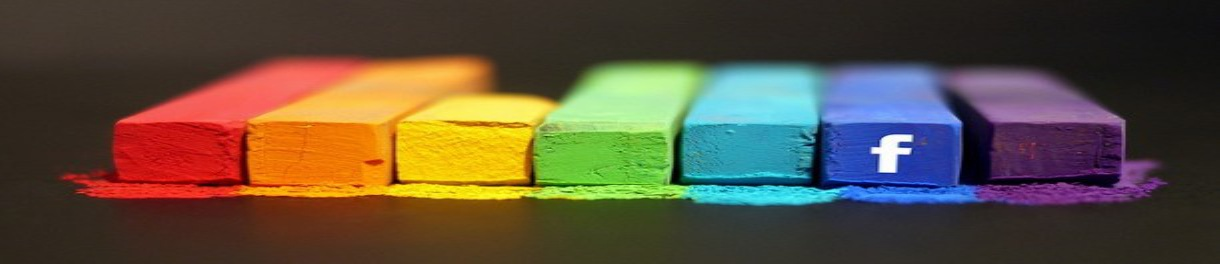

In [175]:
display_cv_image(a)

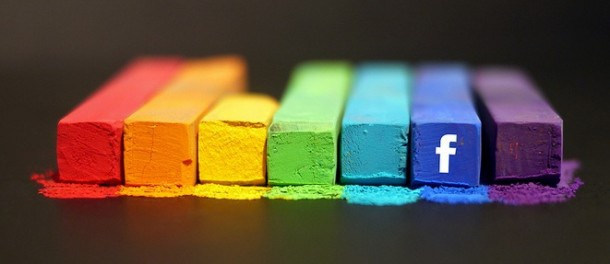

In [176]:
display_cv_image(im)

In [177]:
im.shape

(264, 610, 3)